## Fale spinowe
$J = 0$

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def Sx(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, phi):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # Hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H += - 0.5 * h[n] * sz_list[n] * phi
        #H += - 0.5 * h[n] * (sx_list[n] *np.cos(np.pi/16*n)-sy_list[n]*np.sin(np.pi/16*n))

    # interaction terms
    for n in range(N-1):
        H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sx_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sx_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sx_list, ntraj)

    return result.expect

In [3]:
def Sy(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver,phi):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # Hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H += - 0.5 * h[n] * sz_list[n] * phi
        #H += - 0.5 * h[n] * (sx_list[n] *np.cos(np.pi/16*n)-sy_list[n]*np.sin(np.pi/16*n))

    # interaction terms
    for n in range(N-1):
        H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sy_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sy_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sy_list, ntraj)

    return result.expect

In [4]:
def Sz(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, phi):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # Hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H += - 0.5 * h[n] * sz_list[n] * phi
        #H += - 0.5 * h[n] * (sx_list[n] *np.cos(np.pi/16*n)-sy_list[n]*np.sin(np.pi/16*n))

    # interaction terms
    for n in range(N-1):
        H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [5]:
# use the ode solver
solver = "me"   
# use the monte-carlo solver
#solver = "mc"   

# number of spins
N = 20      

h = np.ones(N)
Jx = np.zeros(N)
Jy = np.zeros(N)
Jz = np.zeros(N)

# dephasing rate
gamma = np.zeros(N)

a = np.pi/10
b = 2*np.pi/N

# intial state
psi_list = []
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*1*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*2*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*3*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*4*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*5*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*6*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*7*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*8*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*9*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*10*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*11*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*12*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*13*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*14*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*15*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*16*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*17*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*18*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*19*b)*np.sin(a)*basis(2,1))
psi_list.append(np.cos(a)*basis(2,0)+np.exp(1j*20*b)*np.sin(a)*basis(2,1))

psi0 = tensor(psi_list)

tlist = np.linspace(0, 20, 200)

sx = Sx(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, np.pi/10)
sy = Sy(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, np.pi/10)
sz = Sz(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver, np.pi/10)

In [6]:
suma_sz = [sum(i) for i in zip(*sz)]

Text(0.5, 1.0, '$\\langle \\sigma_z \\rangle (t)$')

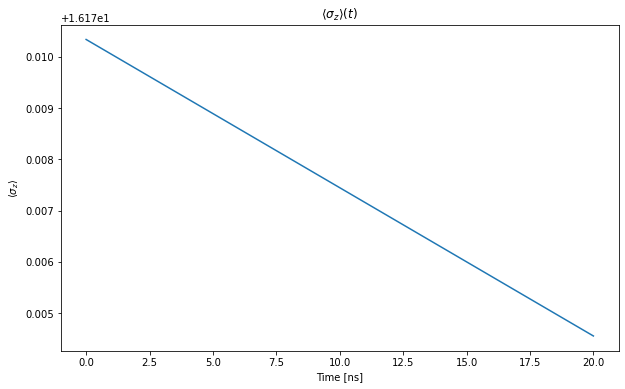

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, suma_sz)

ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle \sigma_z \rangle$')
ax.set_title(r'$\langle \sigma_z \rangle (t)$')

In [8]:
suma_sx = [sum(i) for i in zip(*sx)]

Text(0.5, 1.0, '$\\langle \\sigma_x \\rangle (t)$')

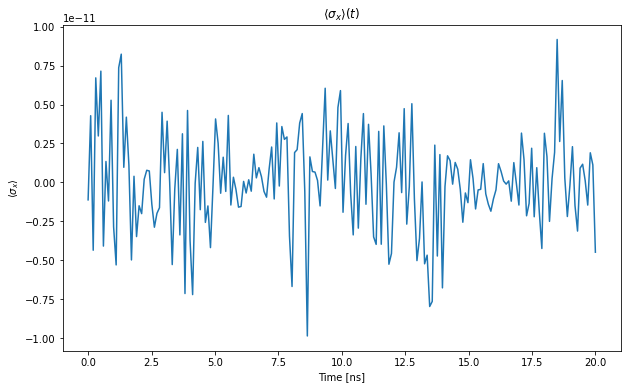

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, suma_sx)

ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle \sigma_x \rangle$')
ax.set_title(r'$\langle \sigma_x \rangle (t)$')

In [10]:
suma_sy = [sum(i) for i in zip(*sy)]

Text(0.5, 1.0, '$\\langle \\sigma_y \\rangle (t)$')

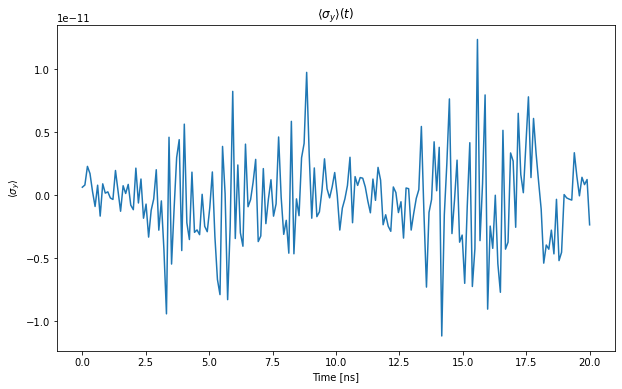

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, suma_sy)

ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle \sigma_y \rangle$')
ax.set_title(r'$\langle \sigma_y \rangle (t)$')

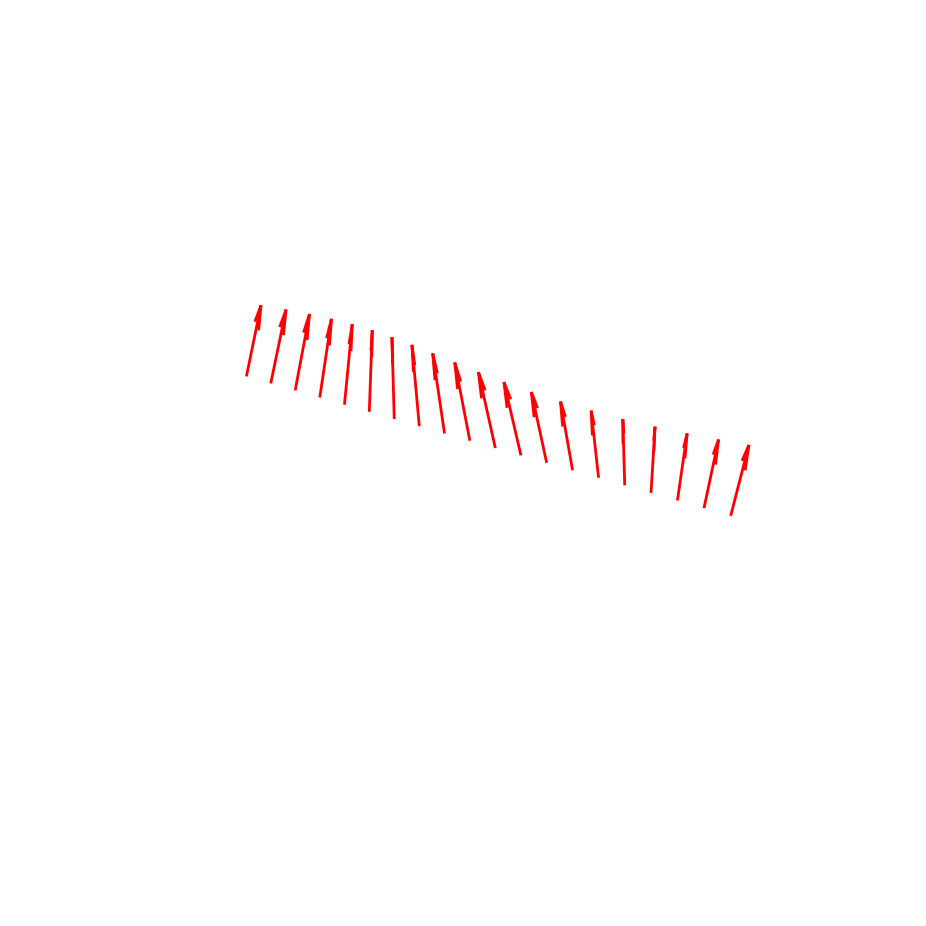

In [12]:
fig = plt.figure(figsize=(12,12), dpi=100)
ax = fig.subplots(subplot_kw=dict(projection="3d"))

def get_arrow(x,i,j):
    y = 0
    z = 0
    u = sx[i][j]
    v = sy[i][j]
    w = sz[i][j]
    return x,y,z,u,v,w
quiver1 = ax.quiver(*get_arrow(-10,0,0), linewidth = 2.0)
quiver2 = ax.quiver(*get_arrow(-9,1,0), linewidth = 2.0)
quiver3 = ax.quiver(*get_arrow(-8,2,0), linewidth = 2.0)
quiver4 = ax.quiver(*get_arrow(-7,3,0), linewidth = 2.0)
quiver5 = ax.quiver(*get_arrow(-6,4,0), linewidth = 2.0)
quiver6 = ax.quiver(*get_arrow(-5,5,0), linewidth = 2.0)
quiver7 = ax.quiver(*get_arrow(-4,6,0), linewidth = 2.0)
quiver8 = ax.quiver(*get_arrow(-3,7,0), linewidth = 2.0)
quiver9 = ax.quiver(*get_arrow(-2,8,0), linewidth = 2.0)
quiver10 = ax.quiver(*get_arrow(-1,9,0), linewidth = 2.0)
quiver11 = ax.quiver(*get_arrow(0,10,0), linewidth = 2.0)
quiver12 = ax.quiver(*get_arrow(1,11,0), linewidth = 2.0)
quiver13 = ax.quiver(*get_arrow(2,12,0), linewidth = 2.0)
quiver14 = ax.quiver(*get_arrow(3,13,0), linewidth = 2.0)
quiver15 = ax.quiver(*get_arrow(4,14,0), linewidth = 2.0)
quiver16 = ax.quiver(*get_arrow(5,15,0), linewidth = 2.0)
quiver17 = ax.quiver(*get_arrow(6,16,0), linewidth = 2.0, color = 'red')
quiver18 = ax.quiver(*get_arrow(7,17,0), linewidth = 2.0, color = 'red')
quiver19 = ax.quiver(*get_arrow(8,18,0), linewidth = 2.0, color = 'red')
quiver20 = ax.quiver(*get_arrow(9,19,0), linewidth = 2.0, color = 'red')

ax.set_xlim(-10, 9)
ax.set_ylim(-10, 9)
ax.set_zlim(-2, 2)
def update(j):
    global quiver1, quiver2, quiver3, quiver4, quiver5, quiver6, quiver7, quiver8, quiver9, quiver10 ,quiver11, quiver12, quiver13, quiver14, quiver15, quiver16, quiver17, quiver18, quiver19, quiver20
    quiver1.remove()
    quiver1 = ax.quiver(*get_arrow(-10,0,j), linewidth = 2.0, color = 'red')
    quiver2.remove()
    quiver2 = ax.quiver(*get_arrow(-9,1,j), linewidth = 2.0, color = 'red')
    quiver3.remove()
    quiver3 = ax.quiver(*get_arrow(-8,2,j), linewidth = 2.0, color = 'red')
    quiver4.remove()
    quiver4 = ax.quiver(*get_arrow(-7,3,j), linewidth = 2.0, color = 'red')
    quiver5.remove()
    quiver5 = ax.quiver(*get_arrow(-6,4,j), linewidth = 2.0, color = 'red')
    quiver6.remove()
    quiver6 = ax.quiver(*get_arrow(-5,5,j), linewidth = 2.0, color = 'red')
    quiver7.remove()
    quiver7 = ax.quiver(*get_arrow(-4,6,j), linewidth = 2.0, color = 'red')
    quiver8.remove()
    quiver8 = ax.quiver(*get_arrow(-3,7,j), linewidth = 2.0, color = 'red')
    quiver9.remove()
    quiver9 = ax.quiver(*get_arrow(-2,8,j), linewidth = 2.0, color = 'red')
    quiver10.remove()
    quiver10 = ax.quiver(*get_arrow(-1,9,j), linewidth = 2.0, color = 'red')
    quiver11.remove()
    quiver11 = ax.quiver(*get_arrow(0,10,j), linewidth = 2.0, color = 'red')
    quiver12.remove()
    quiver12 = ax.quiver(*get_arrow(1,11,j), linewidth = 2.0, color = 'red')
    quiver13.remove()
    quiver13 = ax.quiver(*get_arrow(2,12,j), linewidth = 2.0, color = 'red')
    quiver14.remove()
    quiver14 = ax.quiver(*get_arrow(3,13,j), linewidth = 2.0, color = 'red')
    quiver15.remove()
    quiver15 = ax.quiver(*get_arrow(4,14,j), linewidth = 2.0, color = 'red')
    quiver16.remove()
    quiver16 = ax.quiver(*get_arrow(5,15,j), linewidth = 2.0, color = 'red')
    quiver17.remove()
    quiver17 = ax.quiver(*get_arrow(6,16,j), linewidth = 2.0, color = 'red')
    quiver18.remove()
    quiver18 = ax.quiver(*get_arrow(7,17,j), linewidth = 2.0, color = 'red')
    quiver19.remove()
    quiver19 = ax.quiver(*get_arrow(8,18,j), linewidth = 2.0, color = 'red')
    quiver20.remove()
    quiver20 = ax.quiver(*get_arrow(9,19,j), linewidth = 2.0, color = 'red')
    
plt.axis('off')
ani = FuncAnimation(fig, update, frames=200,interval=10)
HTML(ani.to_html5_video())
#plt.show()

In [13]:
#saving the gif
ani.save('animation3.gif', writer='imagemagick')